<a href="https://colab.research.google.com/github/DarshaPadmanban/24ADI003_24BAD017/blob/main/Exercise_5(SC_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [3]:
import pandas as pd

df = pd.read_csv("breast-cancer.csv", encoding="latin-1")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dataset Sample:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter

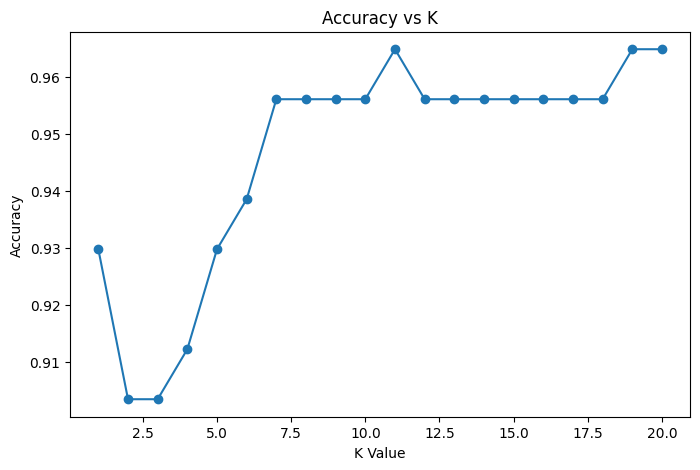

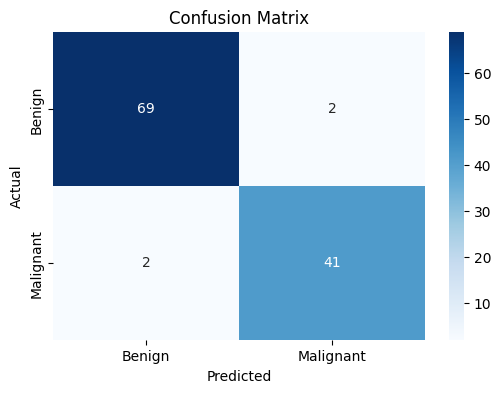

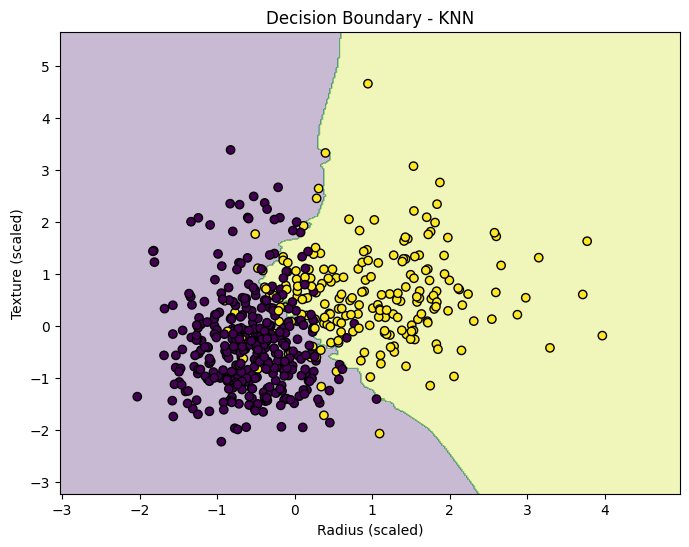

In [4]:
# ==========================================
# BREAST CANCER CLASSIFICATION USING KNN
# ==========================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ==========================================
# 2. Load Dataset
# ==========================================
df = pd.read_csv("breast-cancer.csv")

print("Dataset Sample:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# ==========================================
# 3. Data Inspection & Preprocessing
# ==========================================

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop unnecessary column if exists (common in dataset)
if "id" in df.columns:
    df.drop("id", axis=1, inplace=True)

# ==========================================
# 4. Encode Target Labels (Diagnosis)
# ==========================================
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df["diagnosis"])
# Benign=0, Malignant=1

# ==========================================
# 5. Select Input Features
# ==========================================
features = ["radius_mean", "texture_mean", "perimeter_mean",
            "area_mean", "smoothness_mean"]

X = df[features]
y = df["diagnosis"]

# ==========================================
# 6. Feature Scaling (Important for KNN)
# ==========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 7. Train-Test Split
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ==========================================
# 8. Train KNN + Experiment with K values
# ==========================================
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

best_k = k_values[np.argmax(accuracies)]
print("\nBest K:", best_k)

# Train final model with best K
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

# ==========================================
# 9. Predict Diagnosis
# ==========================================
y_pred = model.predict(X_test)

# ==========================================
# 10. Model Evaluation
# ==========================================
print("\n--- KNN Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==========================================
# 11. Identify Misclassified Cases
# ==========================================
misclassified = np.where(y_test != y_pred)[0]

print("\nNumber of Misclassified Samples:", len(misclassified))

print("\nFirst 5 Misclassified Cases:")
for i in misclassified[:5]:
    print("Actual:", y_test.iloc[i], "Predicted:", y_pred[i])

# ==========================================
# 12. Analyze Model Sensitivity to K
# ==========================================
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

# ==========================================
# Visualization
# ==========================================

# ==========================================
# Confusion Matrix
# ==========================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign","Malignant"],
            yticklabels=["Benign","Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==========================================
# Decision Boundary (using 2 features)
# Using radius_mean & texture_mean
# ==========================================
X_two = df[["radius_mean", "texture_mean"]]
y_two = df["diagnosis"]

scaler2 = StandardScaler()
X_two_scaled = scaler2.fit_transform(X_two)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two_scaled, y_two, test_size=0.2, random_state=42
)

model2 = KNeighborsClassifier(n_neighbors=best_k)
model2.fit(X_train2, y_train2)

# Create mesh grid
x_min, x_max = X_two_scaled[:,0].min()-1, X_two_scaled[:,0].max()+1
y_min, y_max = X_two_scaled[:,1].min()-1, X_two_scaled[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_two_scaled[:,0], X_two_scaled[:,1],
            c=y_two, edgecolor="k")
plt.xlabel("Radius (scaled)")
plt.ylabel("Texture (scaled)")
plt.title("Decision Boundary - KNN")
plt.show()